# Image Classification With Convolutional Neural Network

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
cifar10 = keras.datasets.cifar10

In [51]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


In [52]:
X_train.shape

(50000, 32, 32, 3)

In [53]:
X_test.shape

(10000, 32, 32, 3)

In [54]:
y_train.shape

(50000, 1)

In [55]:
y_test.shape

(10000, 1)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
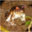

In [56]:
X_train[0]

In [65]:
#Converting 2D to 1D
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [66]:
classes = ["airplain","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

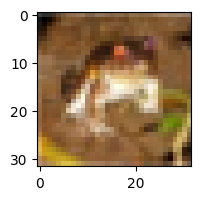

In [67]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

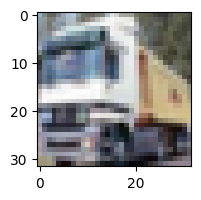

In [64]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [72]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

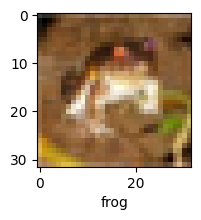

In [73]:
plot_sample(X_train,y_train,0)

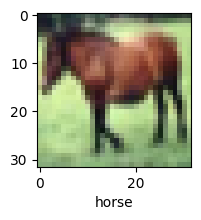

In [74]:
plot_sample(X_train,y_train,7)

In [75]:
#Normalization
X_train = X_train/255
X_test = X_test/255

In [76]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
models=Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(3000,activation='relu'),
    Dense(1000,activation='relu'),
     Dense(10,activation='sigmoid')
])

In [86]:
models.compile(optimizer='SGD',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [93]:
models.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 158s 101ms/step - loss: 1.0676 - accuracy: 0.6302
Epoch 2/5
1563/1563 [==============================] - 155s 99ms/step - loss: 1.0411 - accuracy: 0.6353
Epoch 3/5
1563/1563 [==============================] - 153s 98ms/step - loss: 1.0179 - accuracy: 0.6466
Epoch 4/5
1563/1563 [==============================] - 149s 95ms/step - loss: 0.9901 - accuracy: 0.6561
Epoch 5/5
1563/1563 [==============================] - 155s 99ms/step - loss: 0.9631 - accuracy: 0.6684


In [95]:
models.evaluate(X_test,y_test)

313/313 [==============================] - 10s 33ms/step - loss: 1.3036 - accuracy: 0.5443


[1.3035502433776855, 0.5443000197410583]

## Predictions0

In [96]:
predictions=models.predict(X_test)

313/313 [==============================] - 20s 62ms/step


In [98]:
predictions[0]

array([0.5376235 , 0.5474093 , 0.6876562 , 0.9786757 , 0.82233065,
       0.91319793, 0.5606909 , 0.00952406, 0.53513825, 0.10254031],
      dtype=float32)

In [102]:
np.argmax(predictions[0])

3

In [107]:
y_test[0]

array([3], dtype=uint8)

In [106]:

np.argmax(predictions[7000])

8

In [108]:
y_test[7000]

array([2], dtype=uint8)

## Convolutional Neural Network

In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

# Create a Sequential model
model = Sequential([
    # Adding Convolutional Layer
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    #Dense
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [122]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [123]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.4307 - accuracy: 0.4892
Epoch 2/10
1563/1563 [==============================] - 66s 43ms/step - loss: 1.0895 - accuracy: 0.6160
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9623 - accuracy: 0.6645
Epoch 4/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.8787 - accuracy: 0.6951
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8061 - accuracy: 0.7200
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7468 - accuracy: 0.7385
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.6913 - accuracy: 0.7593
Epoch 8/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6463 - accuracy: 0.7753
Epoch 9/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.6048 - accuracy: 0.7881
Epoch 10/10
1563/1563 [==============================] - 68s 44m

In [124]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9611 - accuracy: 0.6906


[0.9611354470252991, 0.6905999779701233]

# Predictions

In [125]:
pred=model.predict(X_test)

313/313 [==============================] - 7s 23ms/step


In [126]:
np.argmax(pred[1])

8

In [127]:
y_test[1]

array([8], dtype=uint8)

In [128]:
np.argmax(pred[6001])

0

In [129]:
y_test[6001]

array([0], dtype=uint8)

In [130]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [131]:
#converting 2D into 1D
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

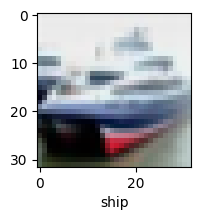

In [132]:
plot_sample(X_test,y_test,1)

In [133]:
np.argmax(pred[5000])

7

In [134]:
#convered in 1D
y_test[5000]

7